Group ?
Member:




Date:




In [ ]:

import yfinance as yf
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go
from datetime import datetime

In [ ]:
def get_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    stock_data = stock_data['Adj Close'].astype(float)
    return stock_data

def get_log_r(price:list)->list[float]:
    return np.log(price/price.shift(1))

def BS():

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'AAPL price chart')

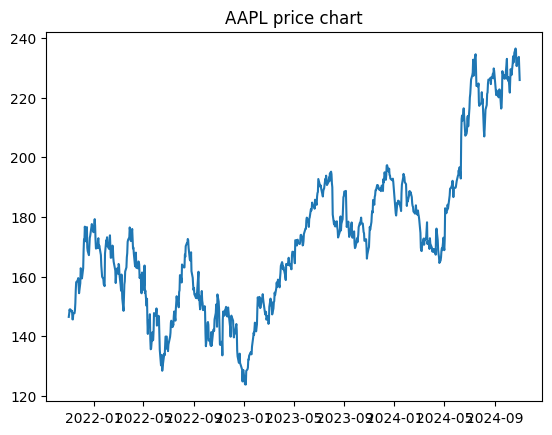

In [54]:
# we use price data of AAPL Inc.
stock_symbol = 'AAPL' # set the stock characters here
start_date = '2021-11-01'
end_date = '2024-11-01'
stock_data=get_stock_data(stock_symbol,start_date,end_date)
N=len(stock_data) 
dt=1/252 # a unit is divided into 252 intervals

stock_data.to_csv('AAPL.csv',sep=',') # save data to local, pass by by default

plt.plot(stock_data)
plt.title(stock_symbol+' price chart')

# 1.1 Fit to GBM
We define $r_i$ to be the return growth rate in a short time interval, namely
$$
    r_i=\frac{lnS_i-lnS_{i-1}}{\Delta t},
$$
then $r_i\sim N(\mu-\frac{1}{2}\sigma^2,\frac{\sigma^2}{\Delta t})$.

Define $y_i= r_i\sqrt{\Delta t}=\frac{lnS_i-lnS_{i-1}}{\sqrt{\Delta t}}$, then
$$\widehat{\sigma^2}=\frac{1}{N-1}\sum_{i=1}^{N}(y_i^2-N\overline{y}^2)$$
$$\hat{\mu}=\overline{r}+\frac{1}{2}\widehat{\sigma^2}


In [ ]:
rdt=get_log_r(stock_data).to_numpy() # define ri*dt=ln(Si)-ln(Si-1)
print(rdt)


In [ ]:
y=rdt/dt**.5
sigma_sq=np.nanvar(y)

np.float64(0.2751102117036042)

Thus, the estimated $\sigma^2$ is 0.0757 and $\sigma$ is 0.2751.

We also have $\overline{r}=\mu-\frac{1}{2}\sigma^2$

In [ ]:
r=rdt/dt
mu=np.nanmean(r)+.5*sigma_sq

0.1825810085111248


Thus we have $\mu=0.1826$ and $\sigma=0.2751$

# 2.2 Numeric PDE



# 2.3 Binomial Model

# 2.4 Black-Scholes Formula

# 3.1 Crude Monte Carlo

# 3.2 Monte Carlo with variance reduction techniques

## 3.2.1

## 3.2.2